In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
win18 = pd.read_excel("LabStats-Usage-History-Winter-2018.xlsx")
spr18 = pd.read_excel("LabStats-Usage-History-Spring-2018.xlsx")
fall18 = pd.read_excel("LabStats-Usage-History-Fall-2018.xlsx")
win19 = pd.read_excel("LabStats-Usage-History-Winter-2019.xlsx")
spr19 = pd.read_excel("LabStats-Usage-History-Spring-2019.xlsx")
fall19 = pd.read_excel("LabStats-Usage-History-Fall-2019.xlsx")
#weird dont know where fall went

In [3]:
#checking it got inputted correctly
fall18.head()

,Name,Interval,Percent Utilization
0,Arts Satellites,9-23-2018 12:00 AM,0.000000
1,Arts Satellites,9-24-2018 12:00 AM,0.002316
2,Arts Satellites,9-25-2018 12:00 AM,0.021095
3,Arts Satellites,9-26-2018 12:00 AM,0.014392
4,Arts Satellites,9-27-2018 12:00 AM,0.067940


In [4]:
win19.tail()

,Name,Interval,Percent Utilization
1045,Classroom C,3-17-2019 12:00 AM,0.000000
1046,Classroom C,3-18-2019 12:00 AM,0.286655
1047,Classroom C,3-19-2019 12:00 AM,0.466667
1048,Classroom C,3-20-2019 12:00 AM,0.000000
1049,Classroom C,3-21-2019 12:00 AM,0.000000


In [5]:
#for copy and paste purposes
fall18
win18
spr18
fall18
win19
spr19

,Name,Interval,Percent Utilization
0,Arts Satellites,3-31-2019 12:00 AM,0.000000
1,Arts Satellites,4-01-2019 12:00 AM,0.097222
2,Arts Satellites,4-02-2019 12:00 AM,0.105476
3,Arts Satellites,4-03-2019 12:00 AM,0.091812
4,Arts Satellites,4-04-2019 12:00 AM,0.095367
...,...,...,...
1120,MacBook Pros (2019),6-09-2019 12:00 AM,0.000000
1121,MacBook Pros (2019),6-10-2019 12:00 AM,0.000000
1122,MacBook Pros (2019),6-11-2019 12:00 AM,0.000000
1123,MacBook Pros (2019),6-12-2019 12:00 AM,0.000000


In [6]:
win18["Interval"] = pd.to_datetime(win18["Interval"])
spr18["Interval"] = pd.to_datetime(spr18["Interval"])
fall18["Interval"] = pd.to_datetime(fall18["Interval"])

win19["Interval"] = pd.to_datetime(win19["Interval"])
spr19["Interval"] = pd.to_datetime(spr19["Interval"])
fall19["Interval"] = pd.to_datetime(fall19["Interval"])


In [7]:
win18.head()

,Name,Interval,Percent Utilization
0,Arts Satellites,2018-01-08,0.132762
1,Arts Satellites,2018-01-09,0.137992
2,Arts Satellites,2018-01-10,0.077218
3,Arts Satellites,2018-01-11,0.080858
4,Arts Satellites,2018-01-12,0.055116


In [8]:
#adding a day of week column to all of them
win18['Day_of_Week'] = win18['Interval'].dt.day_name()
spr18['Day_of_Week'] = spr18['Interval'].dt.day_name()
fall18['Day_of_Week'] = fall18['Interval'].dt.day_name()

win19['Day_of_Week'] = win19['Interval'].dt.day_name()
spr19['Day_of_Week'] = spr19['Interval'].dt.day_name()
fall19['Day_of_Week'] = fall19['Interval'].dt.day_name()

In [9]:
fall18.head()

,Name,Interval,Percent Utilization,Day_of_Week
0,Arts Satellites,2018-09-23,0.000000,Sunday
1,Arts Satellites,2018-09-24,0.002316,Monday
2,Arts Satellites,2018-09-25,0.021095,Tuesday
3,Arts Satellites,2018-09-26,0.014392,Wednesday
4,Arts Satellites,2018-09-27,0.067940,Thursday


In [10]:
#average of each   day of the week  over  the  quarter
w18piv = win18.pivot_table(values= ["Percent Utilization"], columns= ["Day_of_Week"], index=["Name"], aggfunc= np.average)
#rowsiwant = [0,1,2,3,6,7,10,11,12,13,14]
w18piv = w18piv.loc[["Arts Satellites", "CLICC Mainlab", "Classroom C", "East Asian Library", "Music Satellites","SEL Boelter Satellites","SEL Geology Satellites", "YRL Satellites"]]


w18piv


Percent Utilization                                \
Day_of_Week                         Friday    Monday  Saturday    Sunday   
Name                                                                       
Arts Satellites                   0.086233  0.138288  0.004985  0.011355   
CLICC Mainlab                     0.187175  0.242015  0.078030  0.131727   
Classroom C                       0.140045  0.031713  0.000000  0.000000   
East Asian Library                0.019340  0.062172  0.018882  0.025198   
Music Satellites                  0.082198  0.113907  0.013222  0.024337   
SEL Boelter Satellites            0.037470  0.052446  0.010683  0.020043   
SEL Geology Satellites            0.054340  0.066055  0.000000  0.000000   
YRL Satellites                    0.147371  0.225071  0.090954  0.120425   

                                                      
Day_of_Week             Thursday   Tuesday Wednesday  
Name                                                  
Arts Satellites         0.118288  0.165021  0.127983  
CLICC Mainlab           0.239227  0.265891  0.265627  
Classroom C             0.433984  0.057582  0.263906  
East Asian Library      0.129605  0.061051  0.112467  
Music Satellites        0.119479  0.124520  0.138425  
SEL Boelter Satellites  0.054865  0.064555  0.062234  
SEL Geology Satellites  0.068863  0.076487  0.059879  
YRL Satellites          0.225894  0.258335  0.262583

In [11]:
w18piv > .26

Percent Utilization                                  \
Day_of_Week                         Friday Monday Saturday Sunday Thursday   
Name                                                                         
Arts Satellites                      False  False    False  False    False   
CLICC Mainlab                        False  False    False  False    False   
Classroom C                          False  False    False  False     True   
East Asian Library                   False  False    False  False    False   
Music Satellites                     False  False    False  False    False   
SEL Boelter Satellites               False  False    False  False    False   
SEL Geology Satellites               False  False    False  False    False   
YRL Satellites                       False  False    False  False    False   

                                          
Day_of_Week            Tuesday Wednesday  
Name                                      
Arts Satellites          False     False  
CLICC Mainlab             True      True  
Classroom C              False      True  
East Asian Library       False     False  
Music Satellites         False     False  
SEL Boelter Satellites   False     False  
SEL Geology Satellites   False     False  
YRL Satellites           False      True

In [12]:
w18piv.iloc[[3, ]]

Percent Utilization                                \
Day_of_Week                     Friday    Monday  Saturday    Sunday   
Name                                                                   
East Asian Library             0.01934  0.062172  0.018882  0.025198   

                                                  
Day_of_Week         Thursday   Tuesday Wednesday  
Name                                              
East Asian Library  0.129605  0.061051  0.112467

In [13]:

w18pivmax = win18.pivot_table(values= ["Percent Utilization"], columns= ["Day_of_Week"], index=["Name"], aggfunc= max)

w18pivmax

Percent Utilization                                \
Day_of_Week                            Friday    Monday  Saturday    Sunday   
Name                                                                          
ADA Stations                         0.398559  0.380550  0.500000  0.459534   
Arts Satellites                      0.117611  0.194321  0.016653  0.031501   
Biomed Satellites                    0.335166  0.388508  0.165358  0.180449   
CLICC Mainlab                        0.289043  0.327584  0.215913  0.252186   
CLICC Staff                          0.725456  0.691785  0.414132  0.486878   
Circulation Desk Stations            0.519120  0.551216  0.427884  0.502884   
Classroom C                          0.243912  0.052569  0.000000  0.000000   
East Asian Library                   0.087380  0.245984  0.174915  0.175054   
HP Spares                            1.000000  0.710247  1.000000  1.000000   
MacBook Pros (2015)                  1.000000  1.000000  1.000000  1.000000   
Music Satellites                     0.113121  0.202357  0.042203  0.047759   
SEL Boelter Satellites               0.070693  0.090486  0.050668  0.054808   
SEL Geology Satellites               0.112980  0.117190  0.000000  0.000000   
YRL Satellites                       0.330240  0.372699  0.234141  0.242682   

                                                         
Day_of_Week                Thursday   Tuesday Wednesday  
Name                                                     
ADA Stations               0.431823  0.342503  0.489789  
Arts Satellites            0.162867  0.232607  0.178553  
Biomed Satellites          0.337234  0.346147  0.384823  
CLICC Mainlab              0.327617  0.330241  0.360494  
CLICC Staff                0.728791  0.834080  0.723647  
Circulation Desk Stations  0.601586  0.580922  0.615378  
Classroom C                0.805937  0.431447  0.567130  
East Asian Library         0.699601  0.145363  0.410561  
HP Spares                  0.653581  0.060085  0.003592  
MacBook Pros (2015)        1.000000  1.000000  1.000000  
Music Satellites           0.172445  0.173644  0.225903  
SEL Boelter Satellites     0.092340  0.159688  0.090886  
SEL Geology Satellites     0.102633  0.147240  0.145995  
YRL Satellites             0.401858  0.386720  0.422562

In [14]:
max(w18piv)

('Percent Utilization', 'Wednesday')

In [15]:
s18piv = spr18.pivot_table(values= ["Percent Utilization"], columns= ["Day_of_Week"], index=["Name"], aggfunc= np.average)

s18piv

Percent Utilization                                \
Day_of_Week                            Friday    Monday  Saturday    Sunday   
Name                                                                          
ADA Stations                         0.209776  0.202915  0.148926  0.213165   
Arts Satellites                      0.078000  0.113235  0.014552  0.011553   
Biomed Satellites                    0.157002  0.257401  0.094725  0.127431   
CLICC Mainlab                        0.185045  0.238729  0.067778  0.106205   
CLICC Staff                          0.589696  0.609081  0.244633  0.265662   
Circulation Desk Stations            0.497401  0.507881  0.275417  0.316150   
Classroom C                          0.293106  0.005032  0.000347  0.000000   
East Asian Library                   0.039653  0.050486  0.033448  0.033742   
HP Spares                            0.000000  0.000025  0.000000  0.000000   
MacBook Pros (2015)                  0.551630  0.588289  0.511541  0.532170   
Music Satellites                     0.081757  0.132335  0.013450  0.014332   
SEL Boelter Satellites               0.043603  0.052045  0.005397  0.017119   
SEL Geology Satellites               0.029913  0.064246  0.000000  0.000000   
YRL Satellites                       0.136581  0.234186  0.104847  0.113732   

                                                         
Day_of_Week                Thursday   Tuesday Wednesday  
Name                                                     
ADA Stations               0.220711  0.210058  0.200843  
Arts Satellites            0.122540  0.148455  0.151069  
Biomed Satellites          0.241317  0.254428  0.290669  
CLICC Mainlab              0.234659  0.254241  0.260149  
CLICC Staff                0.650742  0.655464  0.695953  
Circulation Desk Stations  0.552366  0.562549  0.581205  
Classroom C                0.289228  0.144193  0.076061  
East Asian Library         0.070209  0.054812  0.049331  
HP Spares                  0.000035  0.005929  0.001388  
MacBook Pros (2015)        0.576845  0.597794  0.590818  
Music Satellites           0.113555  0.130985  0.131534  
SEL Boelter Satellites     0.058647  0.065806  0.047635  
SEL Geology Satellites     0.071783  0.078955  0.050136  
YRL Satellites             0.217112  0.268845  0.249185

In [16]:
s18piv > .6 #CLICC Staff using it the most with busiest day on wednesday

Percent Utilization                                  \
Day_of_Week                            Friday Monday Saturday Sunday Thursday   
Name                                                                            
ADA Stations                            False  False    False  False    False   
Arts Satellites                         False  False    False  False    False   
Biomed Satellites                       False  False    False  False    False   
CLICC Mainlab                           False  False    False  False    False   
CLICC Staff                             False   True    False  False     True   
Circulation Desk Stations               False  False    False  False    False   
Classroom C                             False  False    False  False    False   
East Asian Library                      False  False    False  False    False   
HP Spares                               False  False    False  False    False   
MacBook Pros (2015)                     False  False    False  False    False   
Music Satellites                        False  False    False  False    False   
SEL Boelter Satellites                  False  False    False  False    False   
SEL Geology Satellites                  False  False    False  False    False   
YRL Satellites                          False  False    False  False    False   

                                             
Day_of_Week               Tuesday Wednesday  
Name                                         
ADA Stations                False     False  
Arts Satellites             False     False  
Biomed Satellites           False     False  
CLICC Mainlab               False     False  
CLICC Staff                  True      True  
Circulation Desk Stations   False     False  
Classroom C                 False     False  
East Asian Library          False     False  
HP Spares                   False     False  
MacBook Pros (2015)         False     False  
Music Satellites            False     False  
SEL Boelter Satellites      False     False  
SEL Geology Satellites      False     False  
YRL Satellites              False     False

In [17]:
w19piv = win19.pivot_table(values= ["Percent Utilization"], columns= ["Day_of_Week"], index=["Name"], aggfunc= np.average)
w19piv

Percent Utilization                                \
Day_of_Week                            Friday    Monday  Saturday    Sunday   
Name                                                                          
ADA Stations                         0.084787  0.151581  0.111273  0.147968   
Arts Satellites                      0.046268  0.073425  0.007433  0.005437   
Biomed Satellites                    0.116412  0.155450  0.057005  0.072613   
CLICC Mainlab                        0.171571  0.175367  0.067976  0.093837   
CLICC Staff                          0.185514  0.192675  0.075959  0.071828   
Circulation Desk Stations            0.340738  0.391507  0.207055  0.217712   
Classroom C                          0.374422  0.048742  0.012851  0.000000   
East Asian Library                   0.030642  0.061665  0.015364  0.035362   
HP Spares                            0.000000  0.017226  0.000000  0.000000   
MacBook Pros (2015)                  0.111802  0.118255  0.102683  0.105366   
Music Satellites                     0.062052  0.073423  0.020254  0.018687   
SEL Boelter Satellites               0.029283  0.022915  0.006797  0.002805   
SEL Geology Satellites               0.070733  0.095114  0.000000  0.000000   
YRL Satellites                       0.130715  0.195720  0.064341  0.089907   

                                                         
Day_of_Week                Thursday   Tuesday Wednesday  
Name                                                     
ADA Stations               0.097847  0.133749  0.141320  
Arts Satellites            0.132687  0.091890  0.101345  
Biomed Satellites          0.168414  0.174973  0.210254  
CLICC Mainlab              0.199234  0.207033  0.206206  
CLICC Staff                0.219675  0.230145  0.205968  
Circulation Desk Stations  0.405614  0.411323  0.416775  
Classroom C                0.386890  0.141830  0.271592  
East Asian Library         0.065801  0.072978  0.080651  
HP Spares                  0.000905  0.012148  0.017712  
MacBook Pros (2015)        0.118568  0.120022  0.121237  
Music Satellites           0.081704  0.077694  0.099066  
SEL Boelter Satellites     0.029062  0.036830  0.034877  
SEL Geology Satellites     0.086135  0.077192  0.092579  
YRL Satellites             0.216519  0.230492  0.222476

In [18]:
w19piv > .4 #circulation desk stations are the busiest on Tuesday, Wednesday, Thursday

Percent Utilization                                  \
Day_of_Week                            Friday Monday Saturday Sunday Thursday   
Name                                                                            
ADA Stations                            False  False    False  False    False   
Arts Satellites                         False  False    False  False    False   
Biomed Satellites                       False  False    False  False    False   
CLICC Mainlab                           False  False    False  False    False   
CLICC Staff                             False  False    False  False    False   
Circulation Desk Stations               False  False    False  False     True   
Classroom C                             False  False    False  False    False   
East Asian Library                      False  False    False  False    False   
HP Spares                               False  False    False  False    False   
MacBook Pros (2015)                     False  False    False  False    False   
Music Satellites                        False  False    False  False    False   
SEL Boelter Satellites                  False  False    False  False    False   
SEL Geology Satellites                  False  False    False  False    False   
YRL Satellites                          False  False    False  False    False   

                                             
Day_of_Week               Tuesday Wednesday  
Name                                         
ADA Stations                False     False  
Arts Satellites             False     False  
Biomed Satellites           False     False  
CLICC Mainlab               False     False  
CLICC Staff                 False     False  
Circulation Desk Stations    True      True  
Classroom C                 False     False  
East Asian Library          False     False  
HP Spares                   False     False  
MacBook Pros (2015)         False     False  
Music Satellites            False     False  
SEL Boelter Satellites      False     False  
SEL Geology Satellites      False     False  
YRL Satellites              False     False

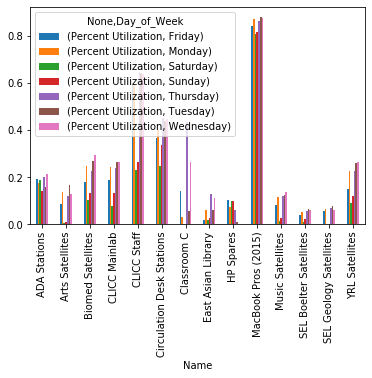

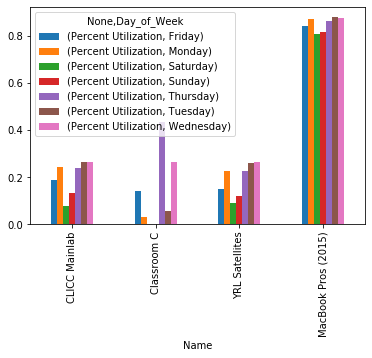

In [19]:
w18piv = win18.pivot_table(values= ["Percent Utilization"], columns= ["Day_of_Week"], index=["Name"], aggfunc= np.average)

w18pivtot = w18piv

w18pivclicc = w18piv.loc[[ "CLICC Mainlab", "Classroom C", "YRL Satellites", "MacBook Pros (2015)"]]

w18pivtot.plot.bar()

w18pivclicc.plot.bar()


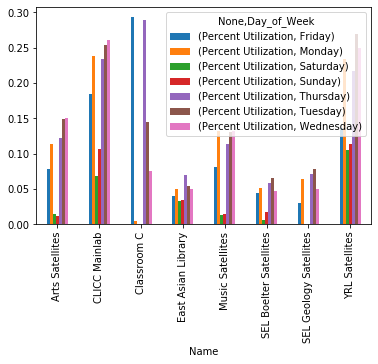

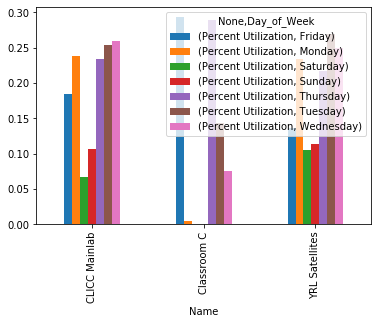

In [20]:
s18piv = spr18.pivot_table(values= ["Percent Utilization"], columns= ["Day_of_Week"], index=["Name"], aggfunc= np.average)

s18pivtot = s18piv.loc[["Arts Satellites", "CLICC Mainlab", "Classroom C", "East Asian Library", "Music Satellites","SEL Boelter Satellites","SEL Geology Satellites", "YRL Satellites"]]

s18pivclicc = s18piv.loc[[ "CLICC Mainlab", "Classroom C", "YRL Satellites"]]

s18pivtot.plot.bar()

s18pivclicc.plot.bar()

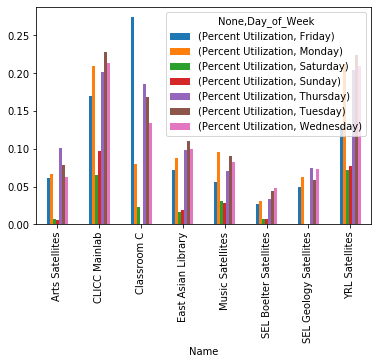

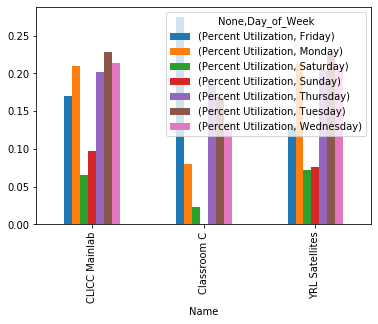

In [21]:
f18piv = fall18.pivot_table(values= ["Percent Utilization"], columns= ["Day_of_Week"], index=["Name"], aggfunc= np.average)

f18pivtot = f18piv.loc[["Arts Satellites", "CLICC Mainlab", "Classroom C", "East Asian Library", "Music Satellites","SEL Boelter Satellites","SEL Geology Satellites", "YRL Satellites"]]

f18pivclicc = f18piv.loc[[ "CLICC Mainlab", "Classroom C", "YRL Satellites"]]

f18pivtot.plot.bar()

f18pivclicc.plot.bar()



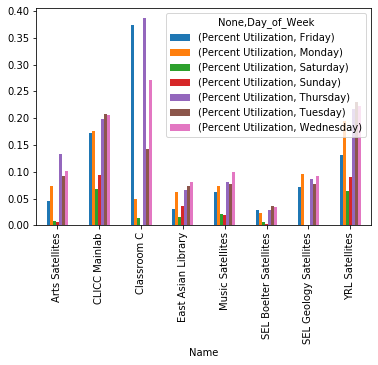

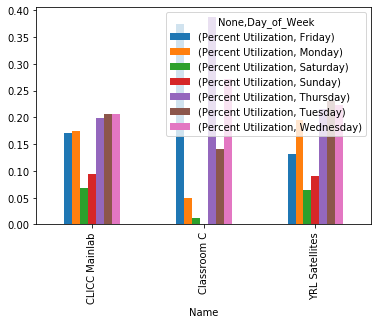

In [22]:
w19piv = win19.pivot_table(values= ["Percent Utilization"], columns= ["Day_of_Week"], index=["Name"], aggfunc= np.average)

w19pivtot = w19piv.loc[["Arts Satellites", "CLICC Mainlab", "Classroom C", "East Asian Library", "Music Satellites","SEL Boelter Satellites","SEL Geology Satellites", "YRL Satellites"]]

w19pivclicc = w19piv.loc[[ "CLICC Mainlab", "Classroom C", "YRL Satellites"]]

w19pivtot.plot.bar()

w19pivclicc.plot.bar()

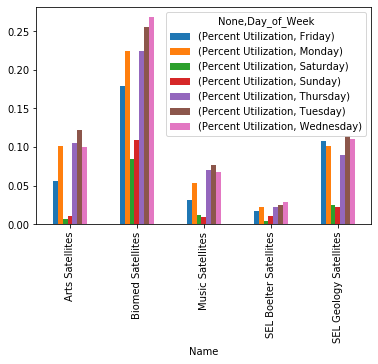

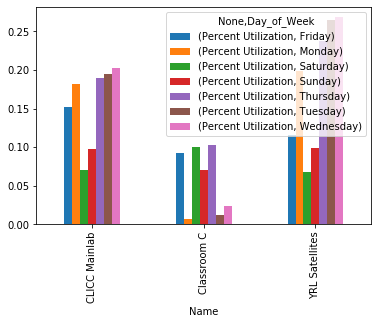

In [23]:
s19piv = spr19.pivot_table(values= ["Percent Utilization"], columns= ["Day_of_Week"], index=["Name"], aggfunc= np.average)

s19pivsat = s19piv.loc[["Arts Satellites", "Biomed Satellites", "Music Satellites","SEL Boelter Satellites","SEL Geology Satellites"]]

s19pivclicc = s19piv.loc[[ "CLICC Mainlab", "Classroom C", "YRL Satellites"]]

s19pivsat.plot.bar()

s19pivclicc.plot.bar()

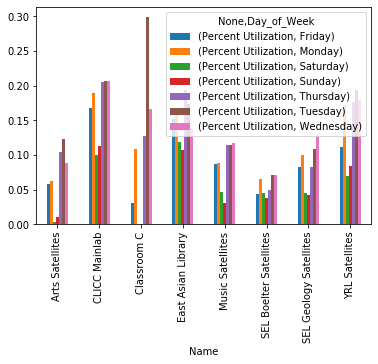

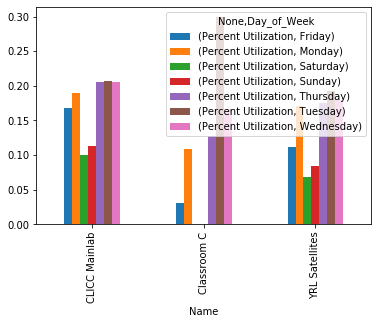

In [24]:
f19piv = fall19.pivot_table(values= ["Percent Utilization"], columns= ["Day_of_Week"], index=["Name"], aggfunc= np.average)

f19pivtot = f19piv.loc[["Arts Satellites", "CLICC Mainlab", "Classroom C", "East Asian Library", "Music Satellites","SEL Boelter Satellites","SEL Geology Satellites", "YRL Satellites"]]

f19pivclicc = f19piv.loc[[ "CLICC Mainlab", "Classroom C", "YRL Satellites"]]

f19pivtot.plot.bar()

f19pivclicc.plot.bar()

In [25]:
max(s19pivclicc)

('Percent Utilization', 'Wednesday')

In [26]:
#every quarter Wednesday is our busiest day, dont think these pivot table are the most telling, lets look at visualizations

In [27]:
#NOW Lets fins busiest weeks of the quarters

In [28]:
spr19.head(10)

,Name,Interval,Percent Utilization,Day_of_Week
0,Arts Satellites,2019-03-31,0.000000,Sunday
1,Arts Satellites,2019-04-01,0.097222,Monday
2,Arts Satellites,2019-04-02,0.105476,Tuesday
3,Arts Satellites,2019-04-03,0.091812,Wednesday
4,Arts Satellites,2019-04-04,0.095367,Thursday
5,Arts Satellites,2019-04-05,0.088629,Friday
6,Arts Satellites,2019-04-06,0.006194,Saturday
7,Arts Satellites,2019-04-07,0.010008,Sunday
8,Arts Satellites,2019-04-08,0.025999,Monday
9,Arts Satellites,2019-04-09,0.077693,Tuesday


In [29]:
spr19.iloc[0,1].isocalendar()[1] #returns the week # of the year

13

In [30]:
spr19['Interval'].dt.strftime('%U')

0       13
1       13
2       13
3       13
4       13
        ..
1120    23
1121    23
1122    23
1123    23
1124    23
Name: Interval, Length: 1125, dtype: object

In [31]:
win18['Week_Number'] = win18['Interval'].dt.strftime('%U')
spr18['Week_Number'] = spr18['Interval'].dt.strftime('%U')
fall18['Week_Number'] = fall18['Interval'].dt.strftime('%U')

win19['Week_Number'] = win19['Interval'].dt.strftime('%U')
spr19['Week_Number'] = spr19['Interval'].dt.strftime('%U')
fall19['Week_Number'] = fall19['Interval'].dt.strftime('%U')

In [32]:
win19.head()

,Name,Interval,Percent Utilization,Day_of_Week,Week_Number
0,Arts Satellites,2019-01-06,0.000000,Sunday,01
1,Arts Satellites,2019-01-07,0.035055,Monday,01
2,Arts Satellites,2019-01-08,0.112857,Tuesday,01
3,Arts Satellites,2019-01-09,0.096486,Wednesday,01
4,Arts Satellites,2019-01-10,0.077885,Thursday,01


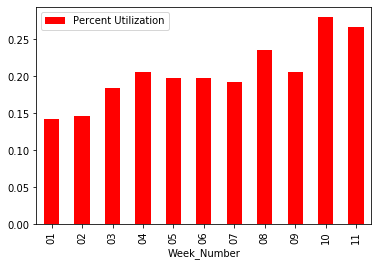

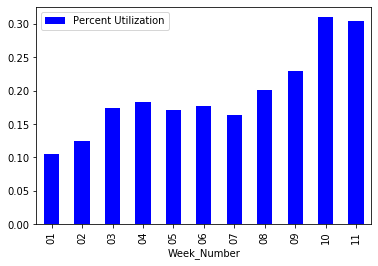

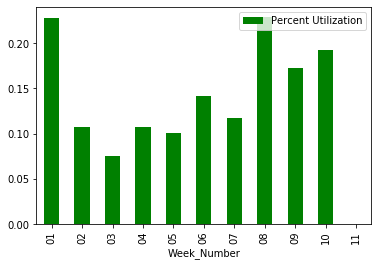

In [33]:
#testing some things
win18[ win18['Name']  == "CLICC Mainlab"].groupby("Week_Number").mean().plot.bar(color = "red")
win18[ win18['Name']  == "YRL Satellites"].groupby("Week_Number").mean().plot.bar(color = "blue")
win18[ win18['Name']  == "Classroom C"].groupby("Week_Number").mean().plot.bar(color = "green")

In [34]:
win18.groupby(["Week_Number"]).mean().rank(ascending = False)
#We see week 10 is our busiest week, week 1 is our second busiest week, and week 7 is our least busy week

,Percent Utilization
Week_Number,
01,2.0
02,8.0
03,10.0
04,9.0
05,4.0
06,6.0
07,11.0
08,5.0
09,7.0


In [35]:
spr18.groupby(["Week_Number"]).mean().rank(ascending = False)
#We see week 10 is our busiest week, week 2 is our second busiest week, and week 9 is our least busy week

,Percent Utilization
Week_Number,
13,3.0
14,2.0
15,5.0
16,4.0
17,7.0
18,8.0
19,9.0
20,10.0
21,11.0


In [36]:
fall18.groupby(["Week_Number"]).mean().rank(ascending = False)
#We see week 10 is our busiest week, finals is our second busiest week, and week 1 is our least busy week

,Percent Utilization
Week_Number,
38,11.0
39,4.0
40,10.0
41,7.0
42,5.0
43,3.0
44,9.0
45,8.0
46,12.0


In [37]:
win19.groupby(["Week_Number"]).mean().rank(ascending = False)
#We see week 10 is our busiest week, week 2 is our second busiest week, and week 6 is our least busy week

,Percent Utilization
Week_Number,
01,7.0
02,2.0
03,4.0
04,3.0
05,9.0
06,11.0
07,8.0
08,10.0
09,6.0


In [38]:
spr19.groupby(["Week_Number"]).mean().rank(ascending = False)
#We see finals week is our busiest week, week 10 is our second busiest week, and week 1 is our least busy week

,Percent Utilization
Week_Number,
13,11.0
14,10.0
15,3.0
16,6.0
17,5.0
18,8.0
19,4.0
20,7.0
21,9.0


In [39]:
fall19.groupby(["Week_Number"]).mean().rank(ascending = False)
#We see week 3 is our busiest week, week 7 is our second busiest week, and week 9 is our least busy week

,Percent Utilization
Week_Number,
38,12.0
39,8.0
40,1.0
41,6.0
42,5.0
43,4.0
44,2.0
45,10.0
46,9.0


In [40]:
win19.groupby(["Week_Number", "Name"]).mean().rank(ascending = False) #so rank 1 means the busiest week
#idea shown in visualization below

Percent Utilization
Week_Number Name                                       
01          ADA Stations                          126.0
            Arts Satellites                       119.0
            Biomed Satellites                      32.0
            CLICC Mainlab                          63.0
            CLICC Staff                             4.0
...                                                 ...
11          MacBook Pros (2015)                    71.0
            Music Satellites                       90.0
            SEL Boelter Satellites                146.0
            SEL Geology Satellites                103.0
            YRL Satellites                         20.0

[154 rows x 1 columns]

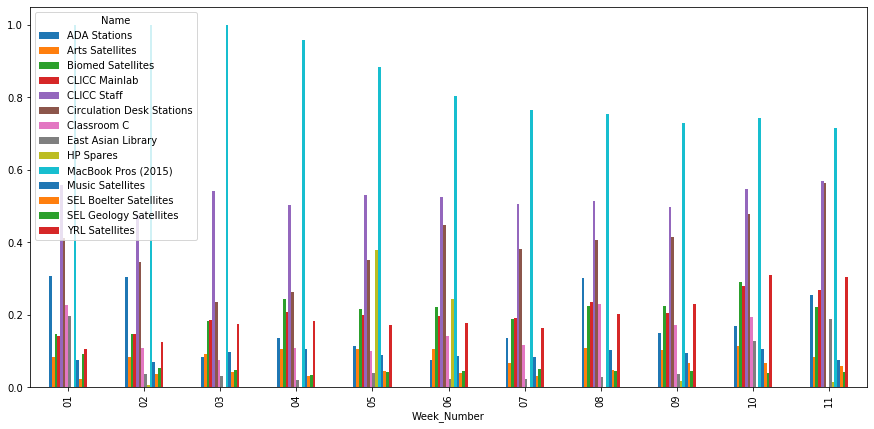

In [41]:
#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
win18.groupby(["Week_Number", "Name"]).mean()['Percent Utilization'].unstack().plot.bar(ax=ax)

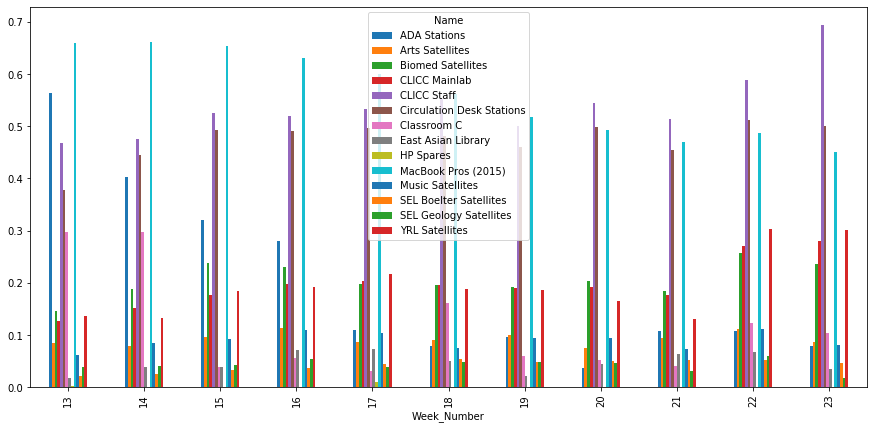

In [42]:
#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
spr18.groupby(["Week_Number", "Name"]).mean()['Percent Utilization'].unstack().plot.bar(ax=ax)

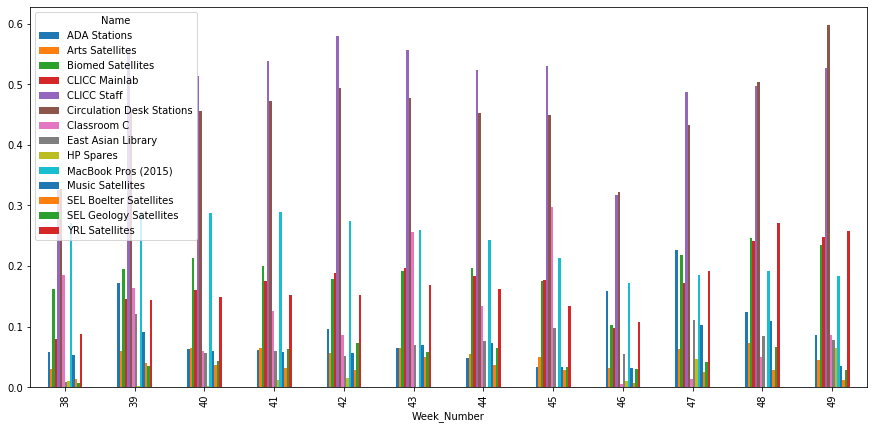

In [43]:
#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
fall18.groupby(["Week_Number", "Name"]).mean()['Percent Utilization'].unstack().plot.bar(ax=ax)

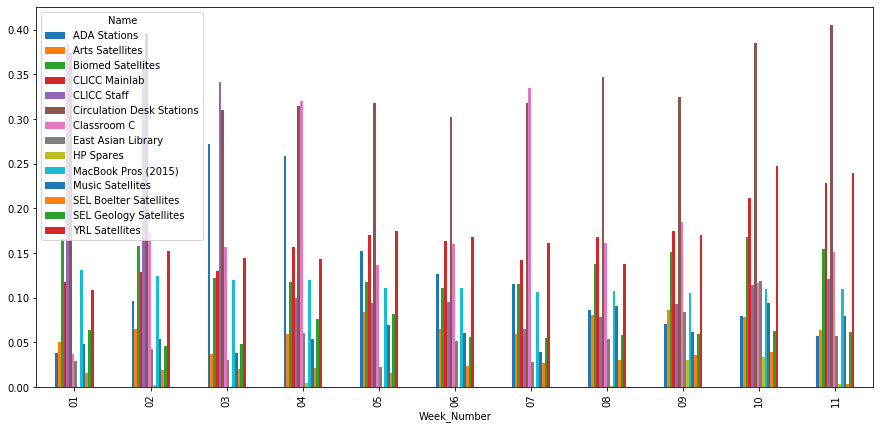

In [44]:
#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
win19.groupby(["Week_Number", "Name"]).mean()['Percent Utilization'].unstack().plot.bar(ax=ax)

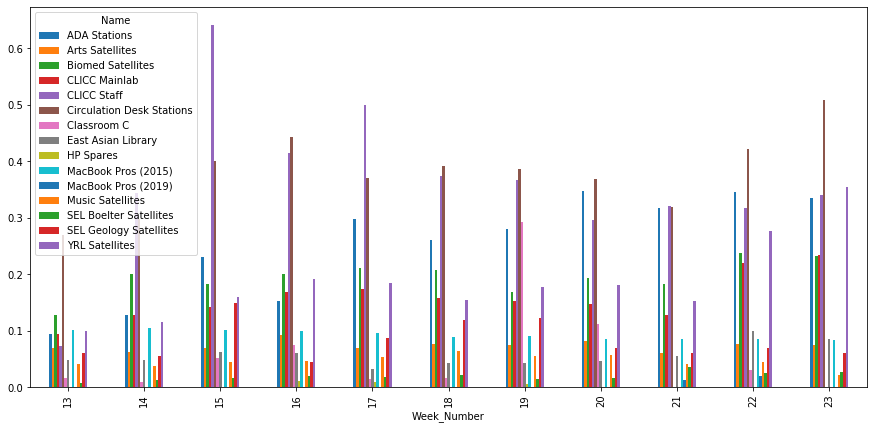

In [45]:
#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
spr19.groupby(["Week_Number", "Name"]).mean()['Percent Utilization'].unstack().plot.bar(ax=ax)

In [46]:
#try doing a pivot table

In [47]:
# NOW interested in all of the satellites
win18satellites = win18[ (win18['Name']  == "Arts Satellites") | (win18['Name']  == "Biomed Satellites") | (win18['Name']  == "SEL Boelter Satellites")  | (win18['Name']  == "SEL Geology Satellites")   | (win18['Name']  == "YRL Satellites") | (win18['Name']  == "Music Satellites")]
spr18satellites = spr18[ (spr18['Name']  == "Arts Satellites") | (spr18['Name']  == "Biomed Satellites") | (spr18['Name']  == "SEL Boelter Satellites")  | (spr18['Name']  == "SEL Geology Satellites")   | (spr18['Name']  == "YRL Satellites") | (spr18['Name']  == "Music Satellites")]
win19satellites = win19[ (win19['Name']  == "Arts Satellites") | (win19['Name']  == "Biomed Satellites") | (win19['Name']  == "SEL Boelter Satellites")  | (win19['Name']  == "SEL Geology Satellites")   | (win19['Name']  == "YRL Satellites") | (win19['Name']  == "Music Satellites")]
spr19satellites = spr19[ (spr19['Name']  == "Arts Satellites") | (spr19['Name']  == "Biomed Satellites") | (spr19['Name']  == "SEL Boelter Satellites")  | (spr19['Name']  == "SEL Geology Satellites")   | (spr19['Name']  == "YRL Satellites") | (spr19['Name']  == "Music Satellites")]




In [48]:
spr18satellites = spr18[ (spr18['Name']  == "Arts Satellites") | (spr18['Name']  == "Biomed Satellites") | (spr18['Name']  == "SEL Boelter Satellites")  | (spr18['Name']  == "SEL Geology Satellites")   | (spr18['Name']  == "YRL Satellites") | (spr18['Name']  == "Music Satellites")]


spr18satellites

,Name,Interval,Percent Utilization,Day_of_Week,Week_Number
0,Arts Satellites,2018-04-01,0.000000,Sunday,13
1,Arts Satellites,2018-04-02,0.086627,Monday,13
2,Arts Satellites,2018-04-03,0.179616,Tuesday,13
3,Arts Satellites,2018-04-04,0.151025,Wednesday,13
4,Arts Satellites,2018-04-05,0.132437,Thursday,13
...,...,...,...,...,...
520,YRL Satellites,2018-06-10,0.300122,Sunday,23
521,YRL Satellites,2018-06-11,0.428517,Monday,23
522,YRL Satellites,2018-06-12,0.313530,Tuesday,23
523,YRL Satellites,2018-06-13,0.274020,Wednesday,23


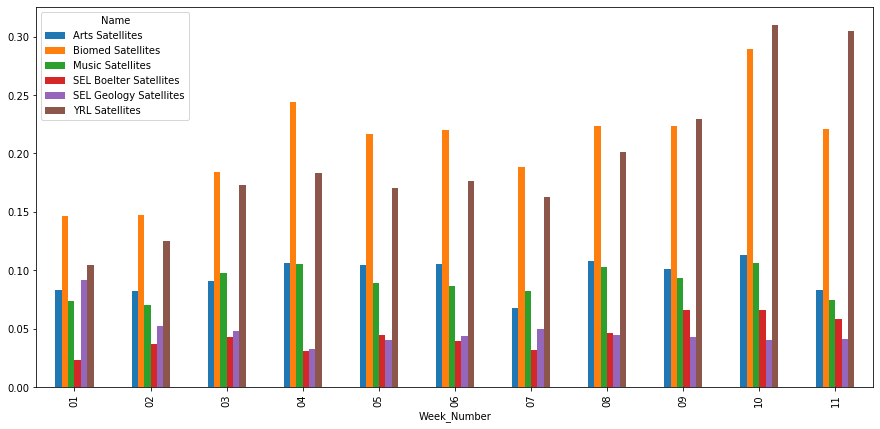

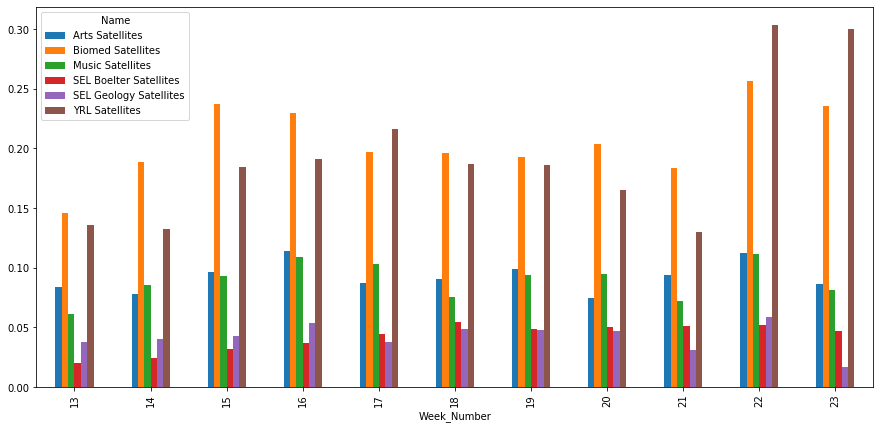

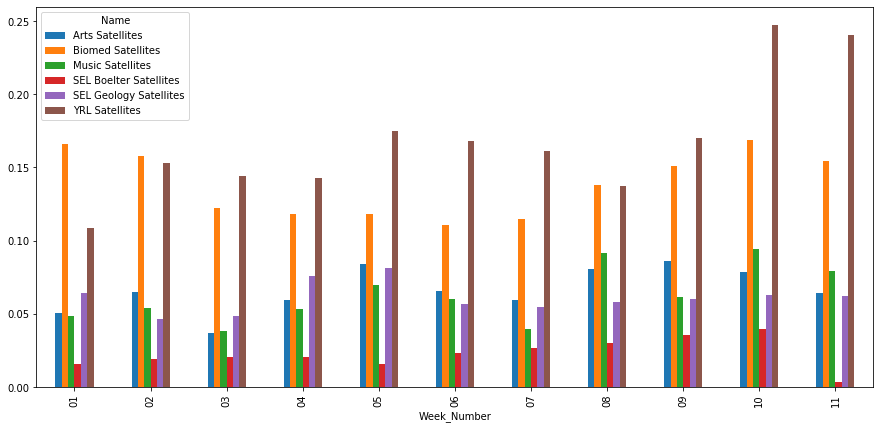

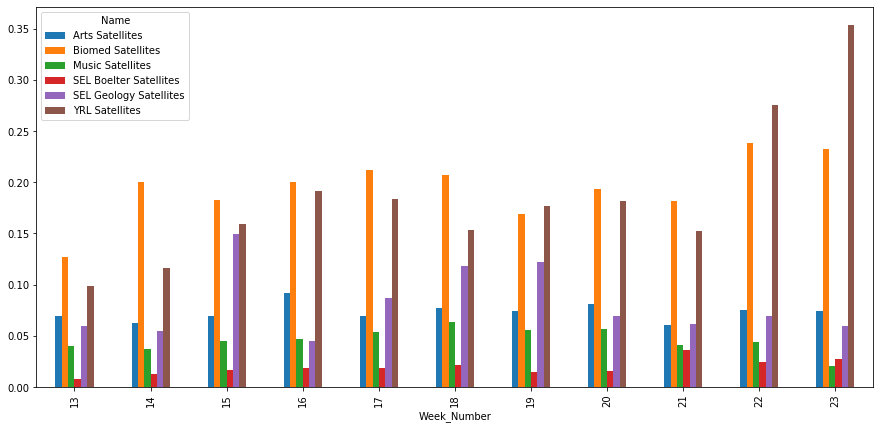

In [49]:
#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
win18satellites.groupby(["Week_Number", "Name"]).mean()['Percent Utilization'].unstack().plot.bar(ax=ax)

#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
spr18satellites.groupby(["Week_Number", "Name"]).mean()['Percent Utilization'].unstack().plot.bar(ax=ax)

#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
win19satellites.groupby(["Week_Number", "Name"]).mean()['Percent Utilization'].unstack().plot.bar(ax=ax)

#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
spr19satellites.groupby(["Week_Number", "Name"]).mean()['Percent Utilization'].unstack().plot.bar(ax=ax)

In [50]:
# NOW LETS SEE CLICC MAINLAB
win18clicc = win18[  (win18["Name"] == "CLICC Mainlab") | (win18["Name"] == "YRL Satellites") | (win18["Name"] == "Classroom C")]
spr18clicc = spr18[  (spr18["Name"] == "CLICC Mainlab") | (spr18["Name"] == "YRL Satellites") | (spr18["Name"] == "Classroom C")]
fall18clicc = fall18[  (fall18["Name"] == "CLICC Mainlab") | (fall18["Name"] == "YRL Satellites") | (fall18["Name"] == "Classroom C")]

win19clicc = win19[  (win19["Name"] == "CLICC Mainlab") | (win19["Name"] == "YRL Satellites") | (win19["Name"] == "Classroom C")]
spr19clicc = spr19[  (spr19["Name"] == "CLICC Mainlab") | (spr19["Name"] == "YRL Satellites") | (spr19["Name"] == "Classroom C")]
fall19clicc = fall19[  (fall19["Name"] == "CLICC Mainlab") | (fall19["Name"] == "YRL Satellites") | (fall19["Name"] == "Classroom C")]


In [51]:
win18clicc.head()

,Name,Interval,Percent Utilization,Day_of_Week,Week_Number
444,YRL Satellites,2018-01-08,0.107741,Monday,01
445,YRL Satellites,2018-01-09,0.069735,Tuesday,01
446,YRL Satellites,2018-01-10,0.189864,Wednesday,01
447,YRL Satellites,2018-01-11,0.124554,Thursday,01
448,YRL Satellites,2018-01-12,0.088508,Friday,01


In [52]:
win18clicc.groupby(["Day_of_Week", "Name"]).mean()

Percent Utilization
Day_of_Week Name                               
Friday      CLICC Mainlab              0.187175
            Classroom C                0.140045
            YRL Satellites             0.147371
Monday      CLICC Mainlab              0.242015
            Classroom C                0.031713
            YRL Satellites             0.225071
Saturday    CLICC Mainlab              0.078030
            Classroom C                0.000000
            YRL Satellites             0.090954
Sunday      CLICC Mainlab              0.131727
            Classroom C                0.000000
            YRL Satellites             0.120425
Thursday    CLICC Mainlab              0.239227
            Classroom C                0.433984
            YRL Satellites             0.225894
Tuesday     CLICC Mainlab              0.265891
            Classroom C                0.057582
            YRL Satellites             0.258335
Wednesday   CLICC Mainlab              0.265627
            Classroom C                0.263906
            YRL Satellites             0.262583

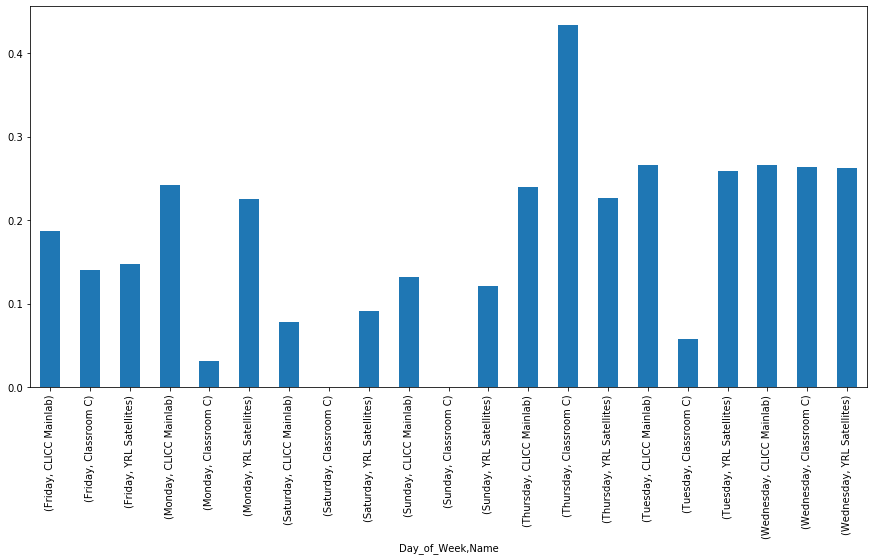

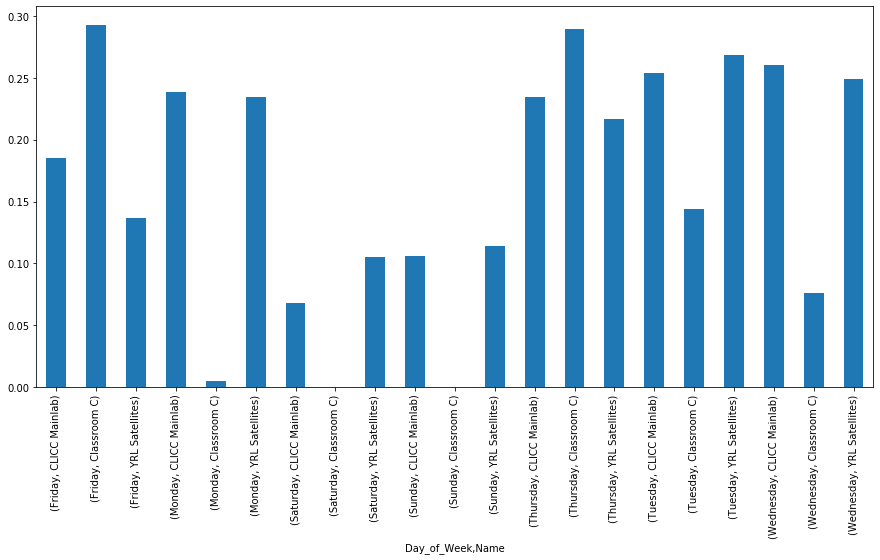

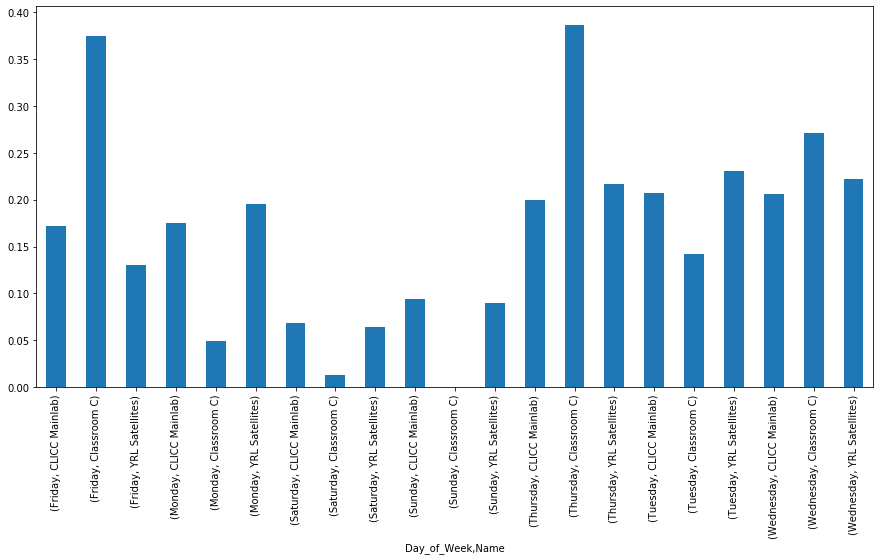

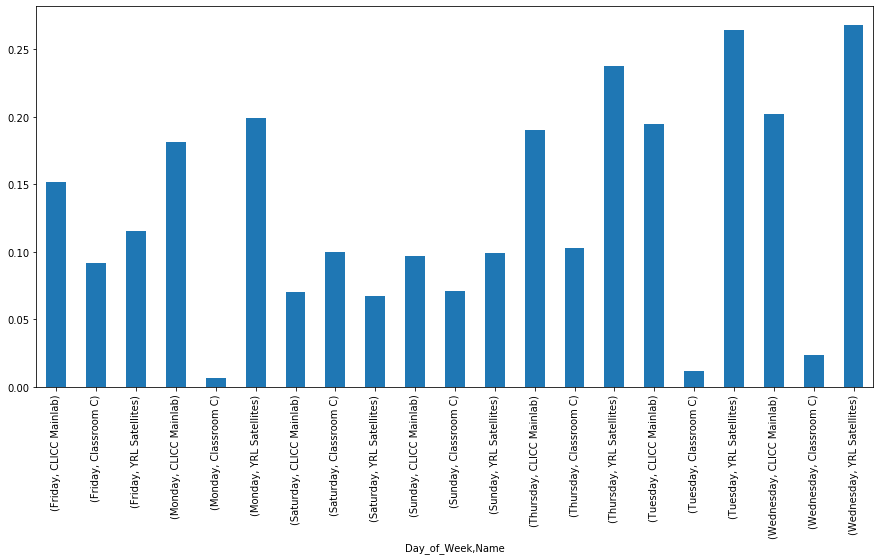

In [53]:
#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
win18clicc.groupby(["Day_of_Week", "Name"]).mean()['Percent Utilization'].plot.bar(ax=ax)

#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
spr18clicc.groupby(["Day_of_Week", "Name"]).mean()['Percent Utilization'].plot.bar(ax=ax)

#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
win19clicc.groupby(["Day_of_Week", "Name"]).mean()['Percent Utilization'].plot.bar(ax=ax)

#groupby visualization example
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
spr19clicc.groupby(["Day_of_Week", "Name"]).mean()['Percent Utilization'].plot.bar(ax=ax)